In [4]:
import os
from os import path
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

if not 'BASE_DIR' in locals():
    BASE_DIR = os.path.abspath(os.curdir)

In [5]:
if os.path.abspath(os.curdir) == BASE_DIR:
    os.chdir('../')

dirname = os.path.abspath(os.curdir) + r'\data'
df = pd.read_csv(path.join(os.sep, dirname, 'Annual rainfall in Nottingham castle 1867  1939.csv'))
df = df.drop('Unnamed: 0', axis=1)
df.head()

,x
0,29.90
1,25.33
2,27.75
3,17.93
4,26.83


In [6]:
df['MA_window_3'] = df['x'].rolling(window=3).mean()
df

,x,MA_window_3
0,29.90,NaN
1,25.33,NaN
2,27.75,27.660000
3,17.93,23.670000
4,26.83,24.170000
...,...,...
68,26.81,22.256667
69,23.32,23.423333
70,24.29,24.806667
71,20.38,22.663333


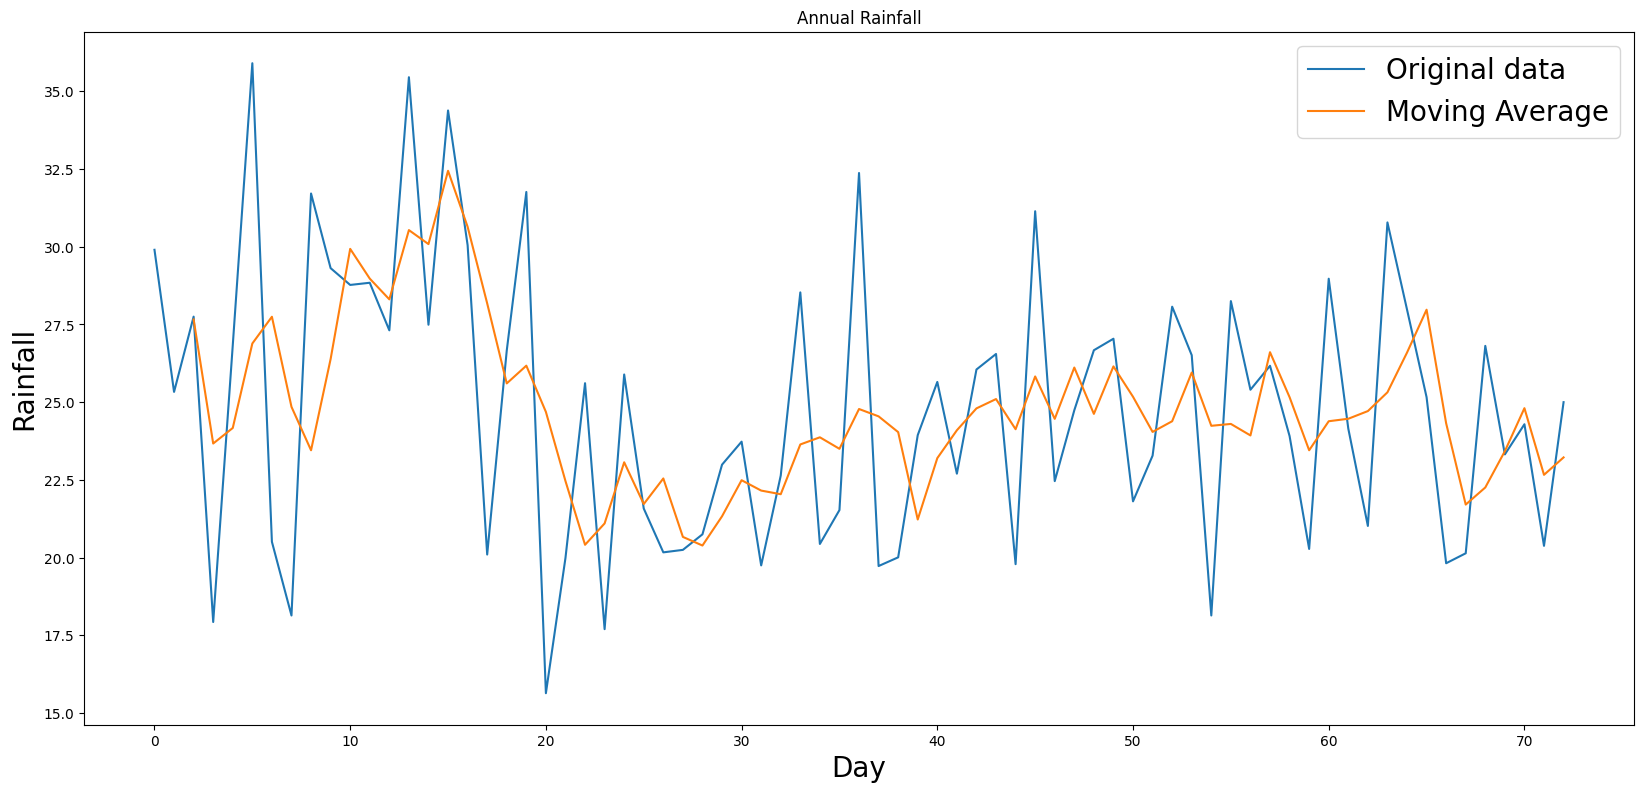

In [7]:
fig = plt.figure(figsize=(20, 9))
plt.plot(df['x'], label='Original data')
plt.plot(df['MA_window_3'], label='Moving Average')
plt.legend(fontsize="20")
plt.title('Annual Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Day', fontsize="20")
plt.show()

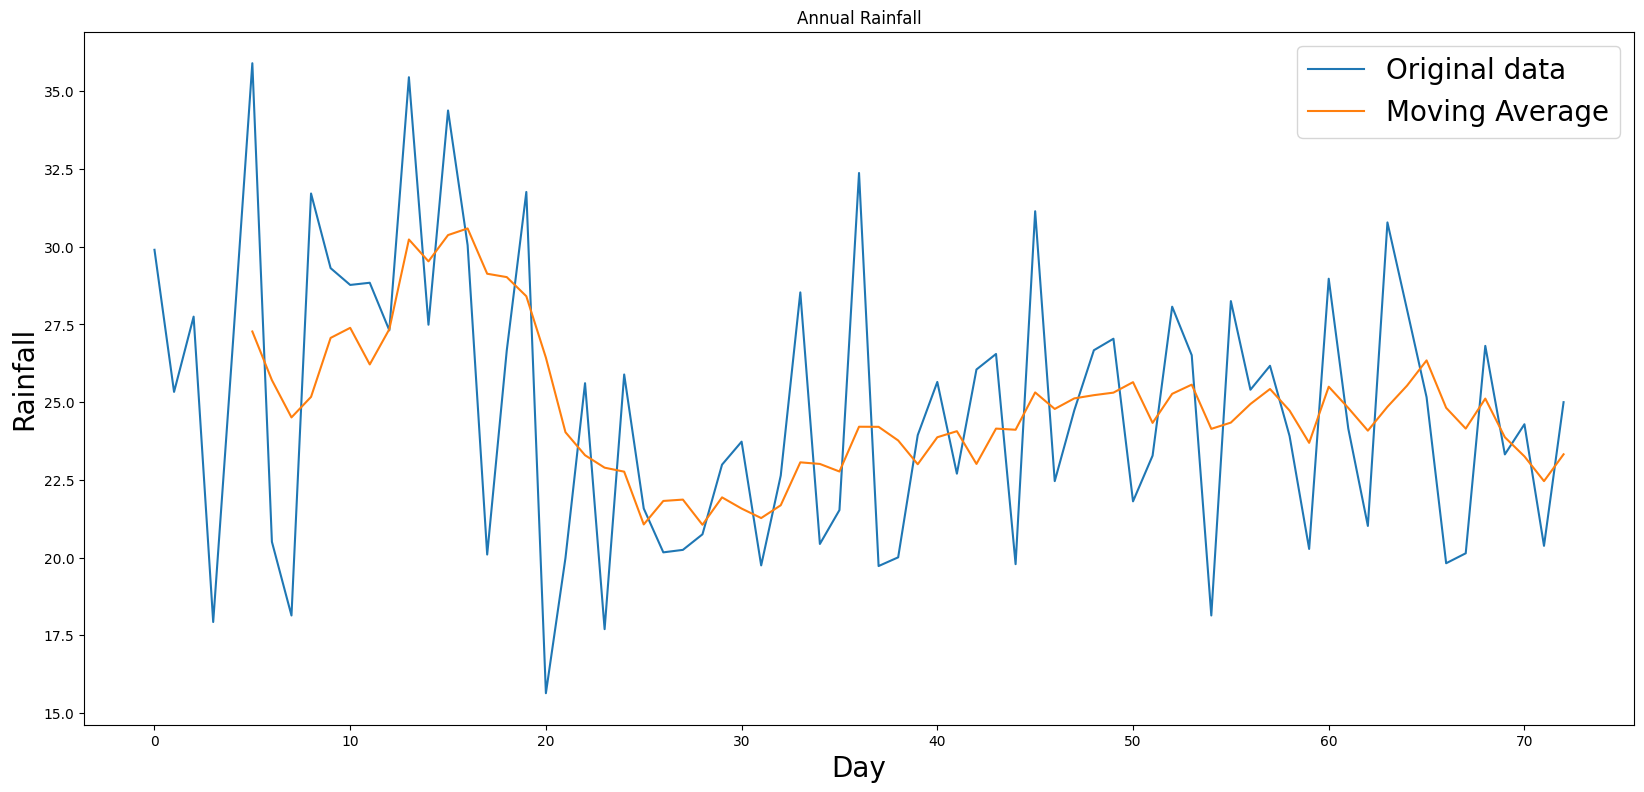

In [8]:
df['MA_window_6'] = df['x'].rolling(window=6).mean()
fig = plt.figure(figsize=(20, 9))
plt.plot(df['x'], label='Original data')
plt.plot(df['MA_window_6'], label='Moving Average')
plt.legend(fontsize="20")
plt.title('Annual Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Day', fontsize="20")
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
arma_model = ARIMA(df['x'], order=(5,0,3))
arma_model_fit = arma_model.fit()

In [11]:
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   73
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -201.583
Date:                Thu, 29 Feb 2024   AIC                            423.165
Time:                        19:12:24   BIC                            446.070
Sample:                             0   HQIC                           432.293
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8552      0.906     27.448      0.000      23.080      26.630
ar.L1          0.4474      0.425      1.052      0.293      -0.386       1.281
ar.L2         -0.4923      0.548     -0.899      0.3

In [12]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [13]:
print(len(train))
print(len(test))
print(len(arma_predictions))

48
25
25


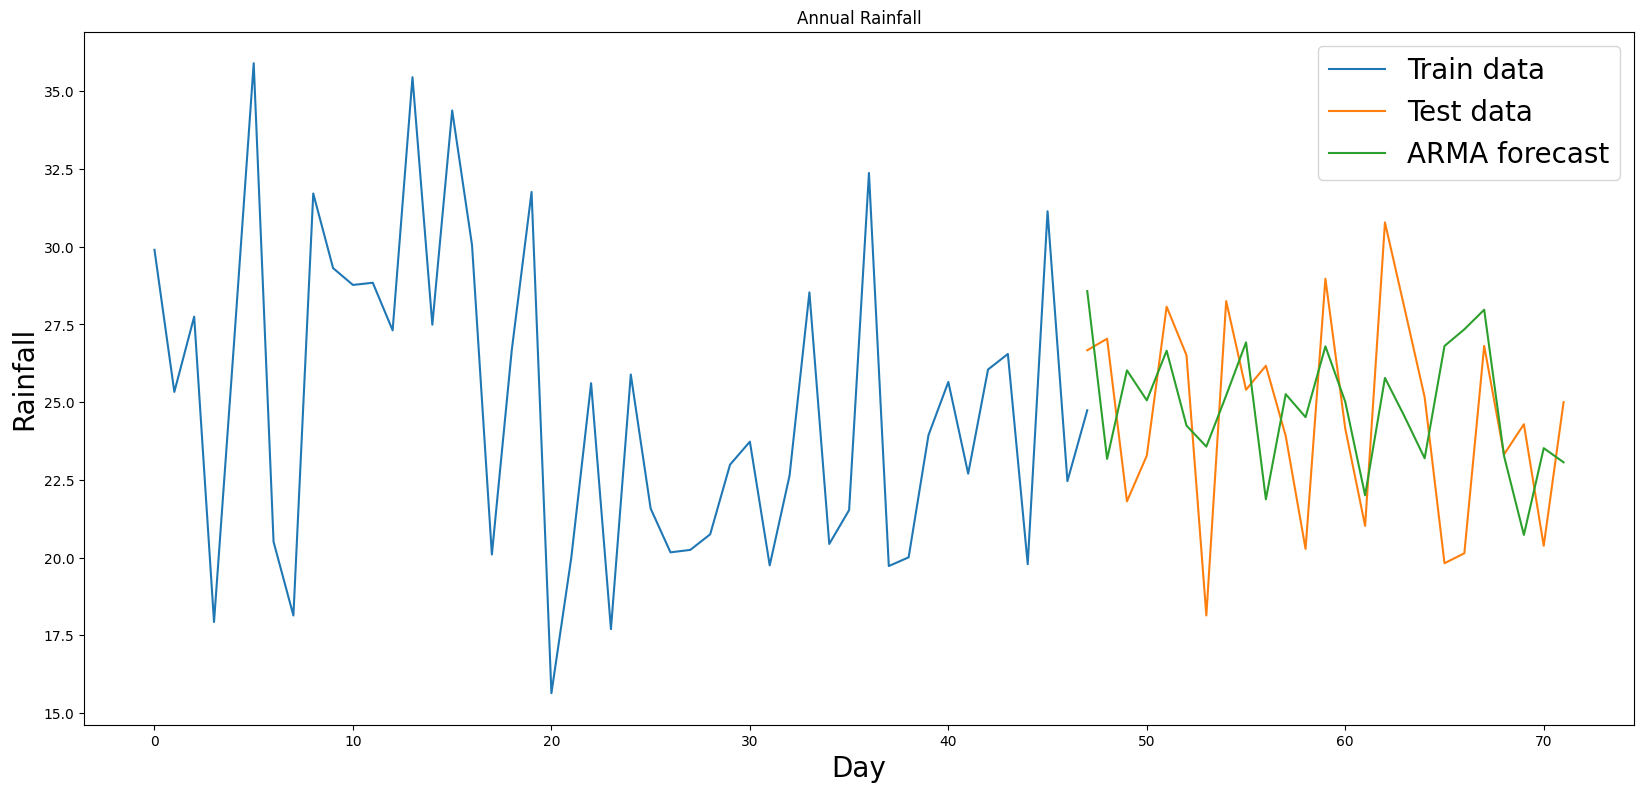

In [14]:


fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('Annual Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Day', fontsize="20")
plt.show()



# ARIMA

In [15]:
arima_model = ARIMA(df['x'], order=(10,2,10))
arima_model_fit = arima_model.fit()

C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   73
Model:               ARIMA(10, 2, 10)   Log Likelihood                -200.024
Date:                Thu, 29 Feb 2024   AIC                            442.047
Time:                        19:12:26   BIC                            489.564
Sample:                             0   HQIC                           460.943
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4965      0.871     -1.718      0.086      -3.203       0.210
ar.L2         -1.7664      0.917     -1.926      0.054      -3.564       0.031
ar.L3         -1.8013      1.664     -1.082      0.2

<Axes: >

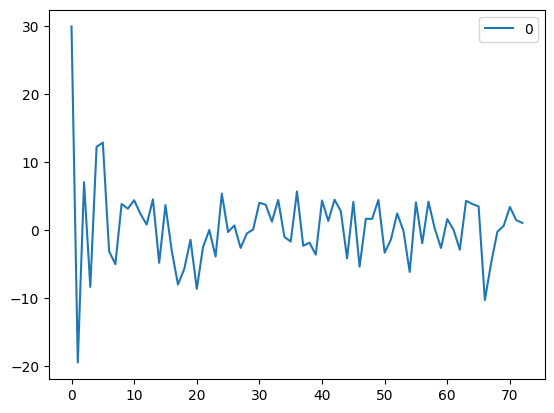

In [17]:
arima_residuals = pd.DataFrame(arima_model_fit.resid)
arima_residuals.plot()

In [18]:
output = arima_model_fit.forecast()

In [19]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\leous\AppData\Local

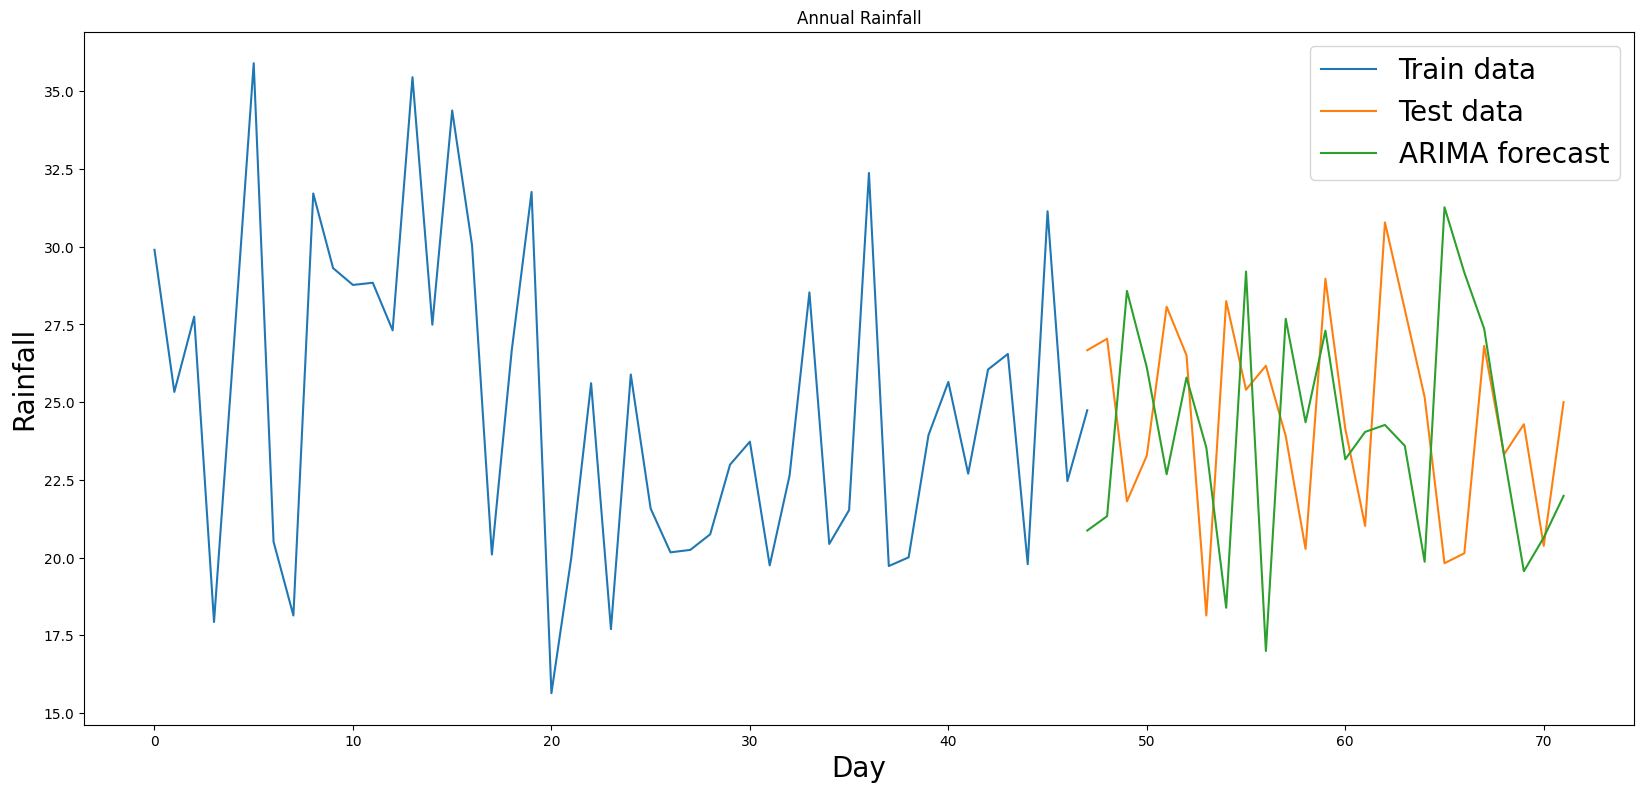

In [20]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Annual Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Day', fontsize="20")
plt.show()

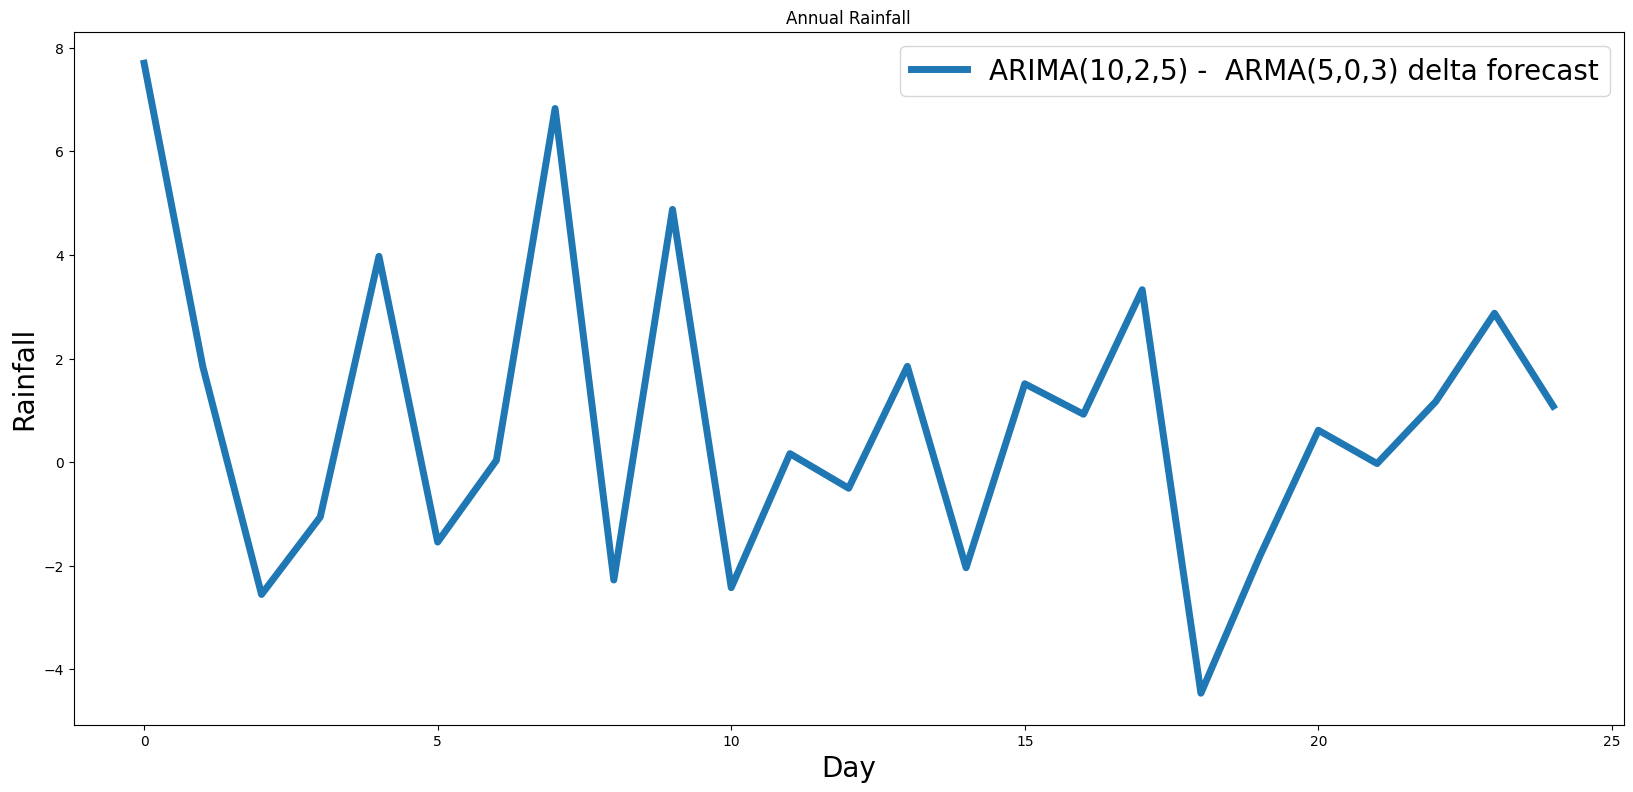

In [21]:
fig = plt.figure(figsize=(20, 9))

delta = []

for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.title('Annual Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Day', fontsize="20")
plt.show()

<Axes: >

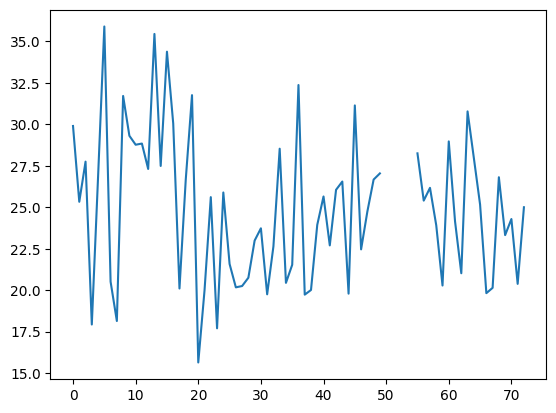

In [22]:
o_df = df.copy()

o_df["x"][50:55] = np.nan

o_df["x"].plot()

<Axes: title={'center': 'среднее из предыдущего и последующего'}>

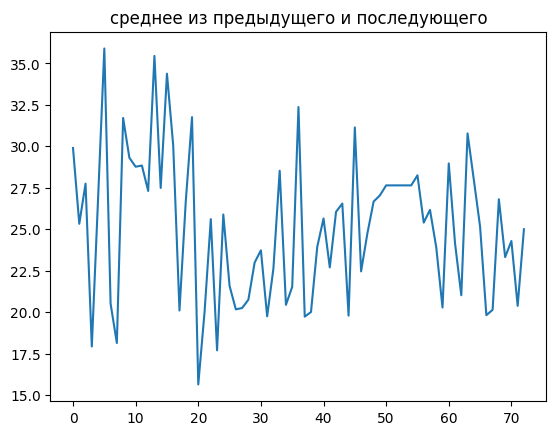

In [23]:
new_value = (o_df["x"][55] + o_df["x"][49])/2

o_df["x"][50:55] = new_value

o_df['x'].plot(title="среднее из предыдущего и последующего")

<Axes: title={'center': 'Последующее значение'}>

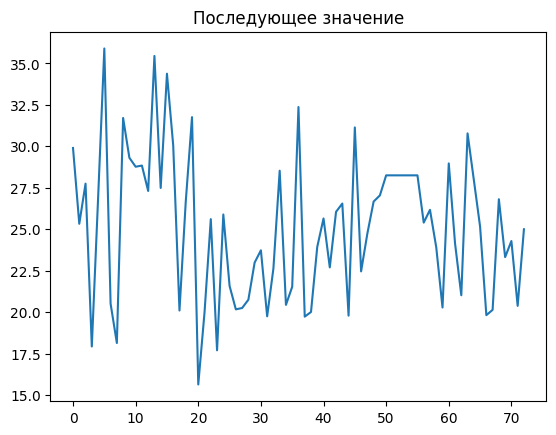

In [24]:
new_value = o_df["x"][55]

o_df["x"][50:55] = new_value

o_df['x'].plot(title='Последующее значение')

<Axes: title={'center': 'Предыдущее значение'}>

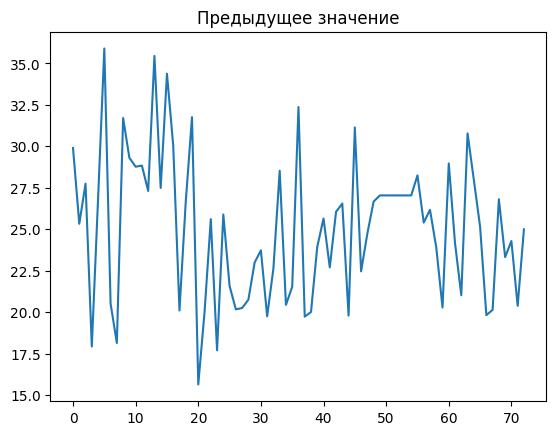

In [25]:
new_value = o_df["x"][49]

o_df["x"][50:55] = new_value

o_df["x"].plot(title='Предыдущее значение')

<Axes: title={'center': 'медиана'}>

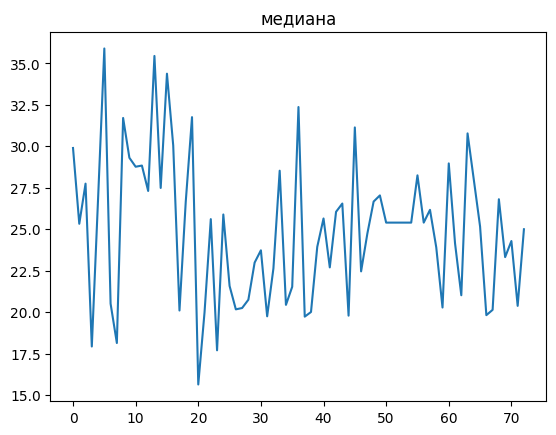

In [26]:
new_value = o_df["x"].median()

o_df["x"][50:55] = new_value

o_df["x"].plot(title='медиана') 

<Axes: title={'center': 'среднее'}>

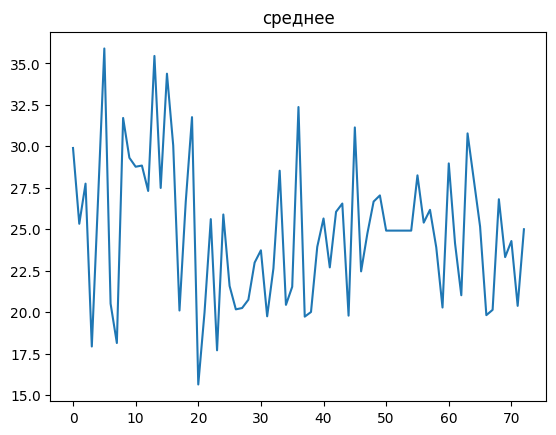

In [27]:
new_value = o_df["x"].mean()

o_df["x"][50:55] = new_value

o_df["x"].plot(title='среднее') 

<Axes: title={'center': 'zero'}>

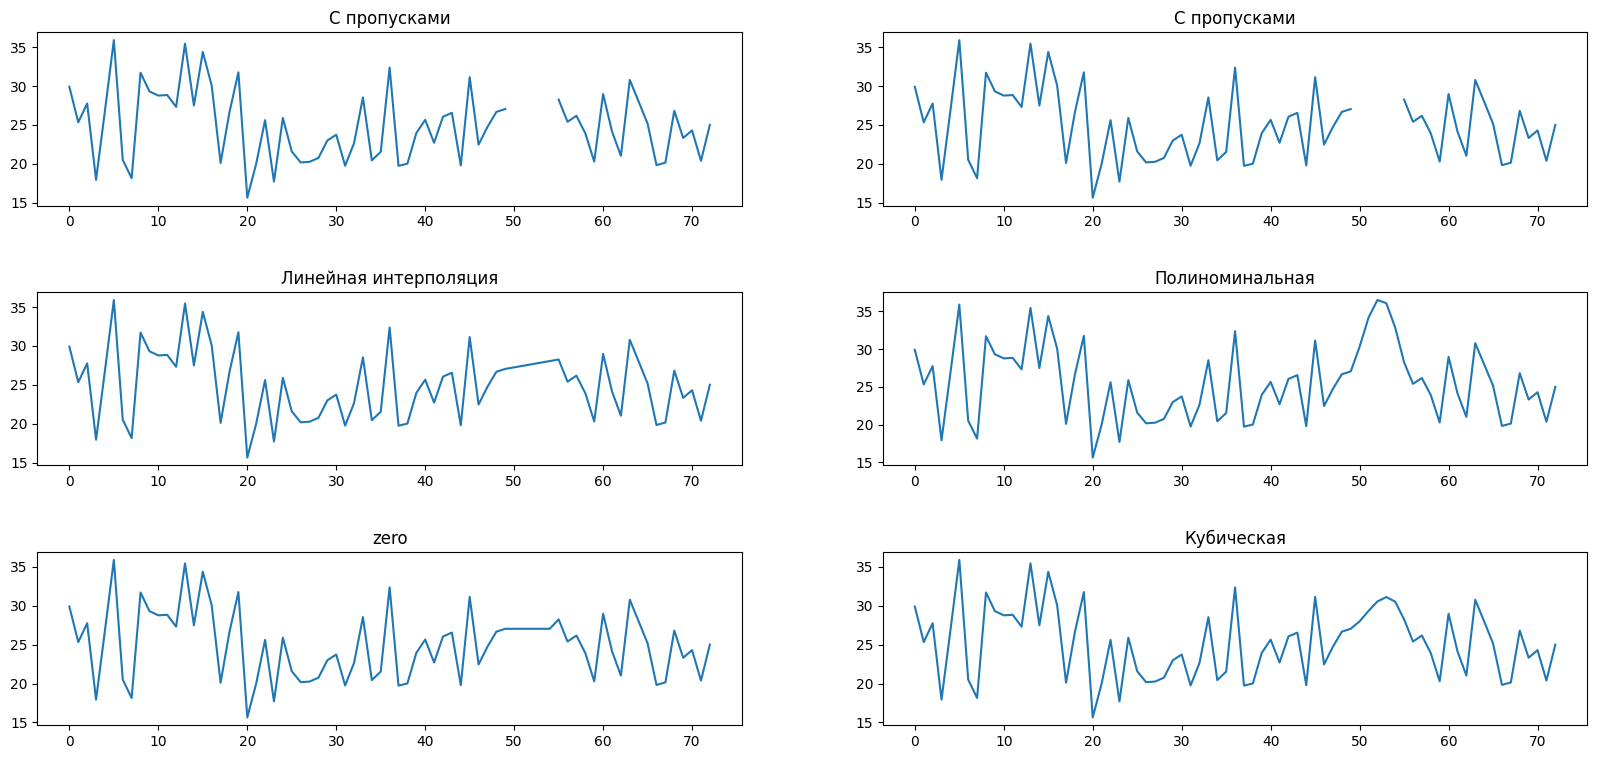

In [28]:
o_df["x"][50:55] = np.nan

lin_df = o_df.interpolate(method="linear")

cub_df = o_df.interpolate(method="cubic")

pol_df = o_df.interpolate(method="polynomial", order=5)

zero_df = o_df.interpolate(method="zero")


fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_df['x'].plot(title="С пропусками", ax = original_ax)  
o_df['x'].plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df['x'].plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df['x'].plot(title="Кубическая", ax = cub_ax) 
pol_df['x'].plot(title="Полиноминальная", ax = pol_ax) 
zero_df['x'].plot(title="zero", ax=zero_ax)

In [29]:
import seaborn as sns

<Axes: >

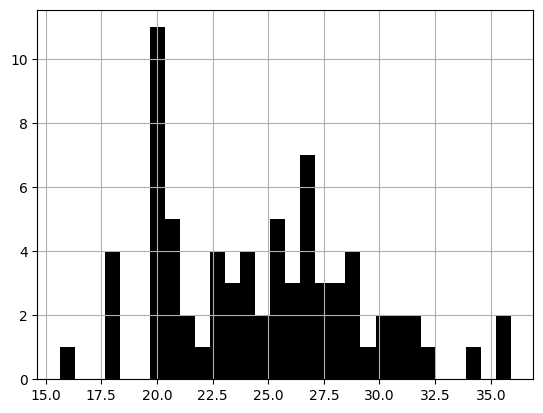

In [30]:
df["x"].hist(bins=30, color="black")

Text(0.5, 1.0, 'Rainfall')

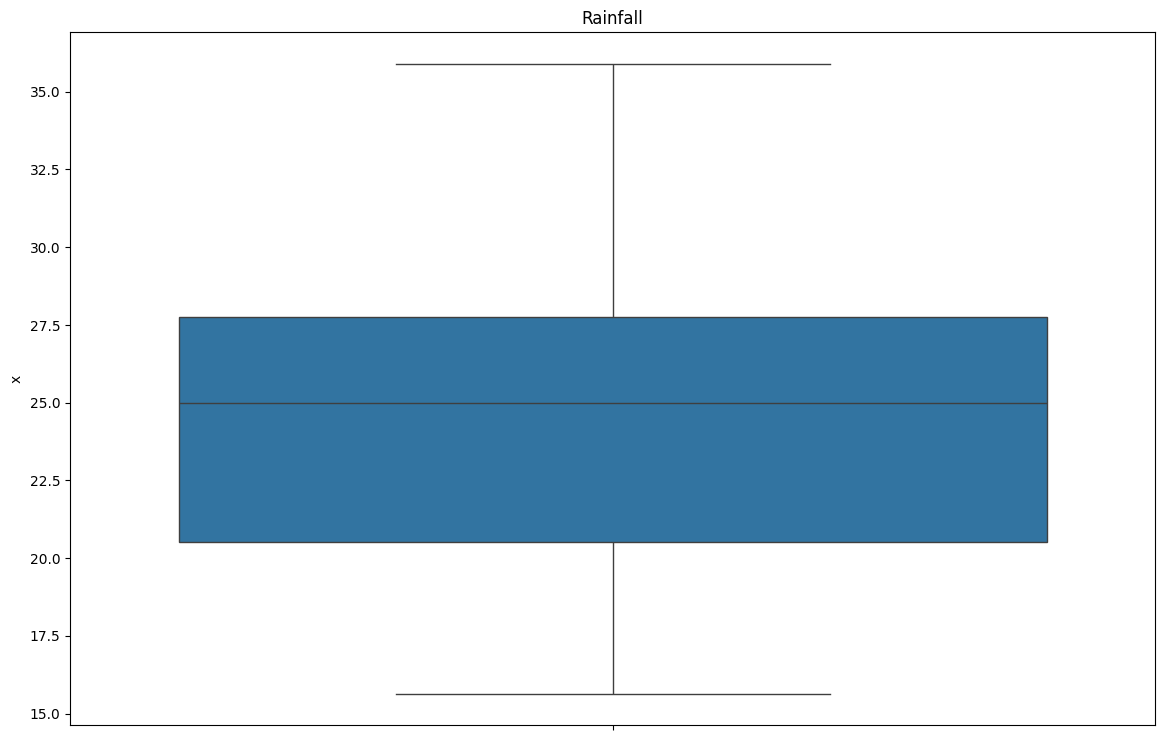

In [31]:
fig = plt.figure(figsize=(14, 9))
 
sns.boxplot(df.x).set_title('Rainfall')

In [32]:
from sklearn import preprocessing, svm

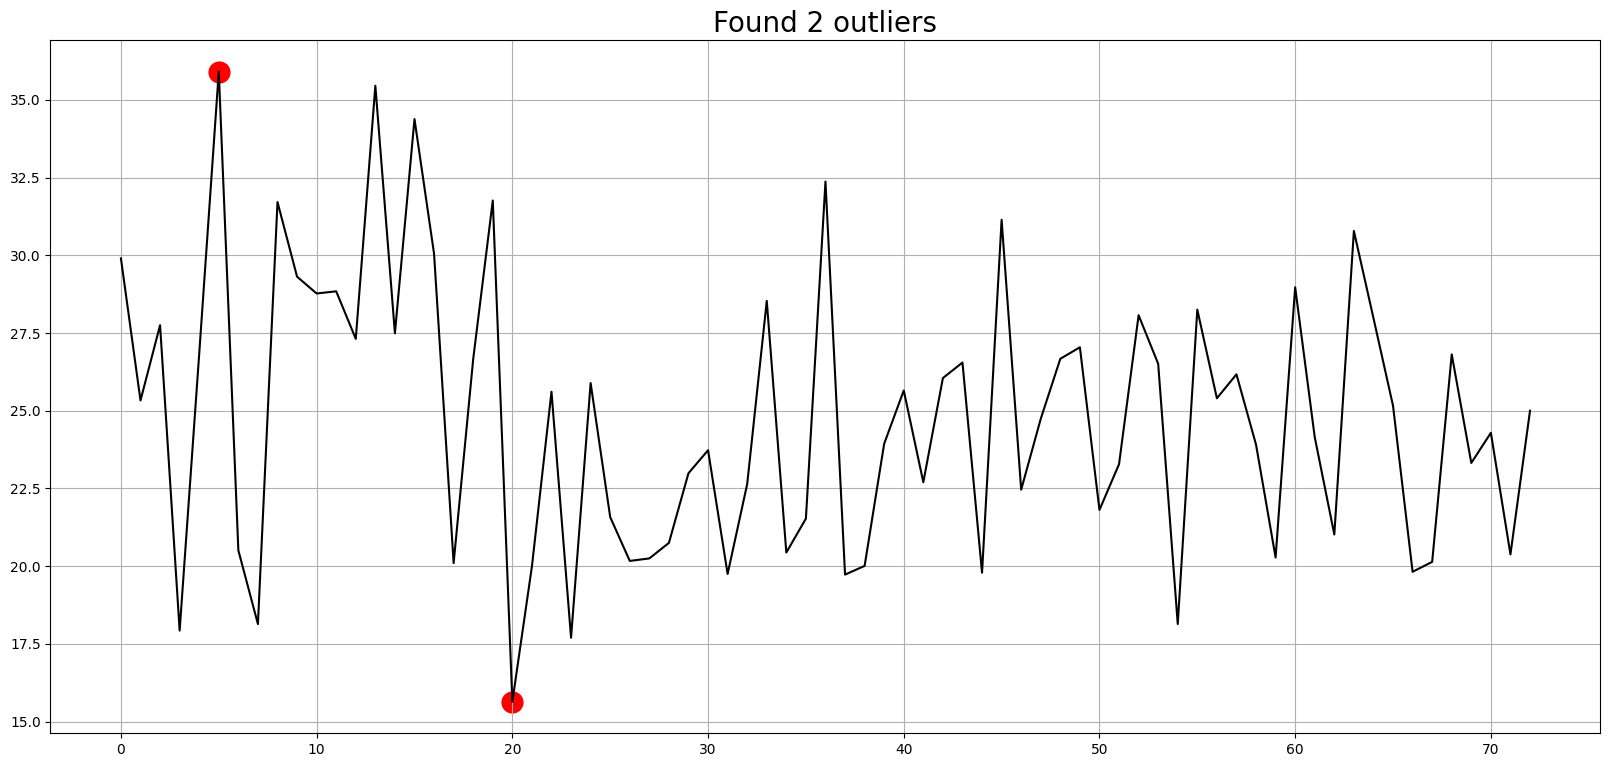

In [33]:
scaler = preprocessing.StandardScaler()
perc = 0.01

local_df = df["x"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
## dtf output
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                                            x: 1 if x==-1 else 0)
## plot
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
        color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
           color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

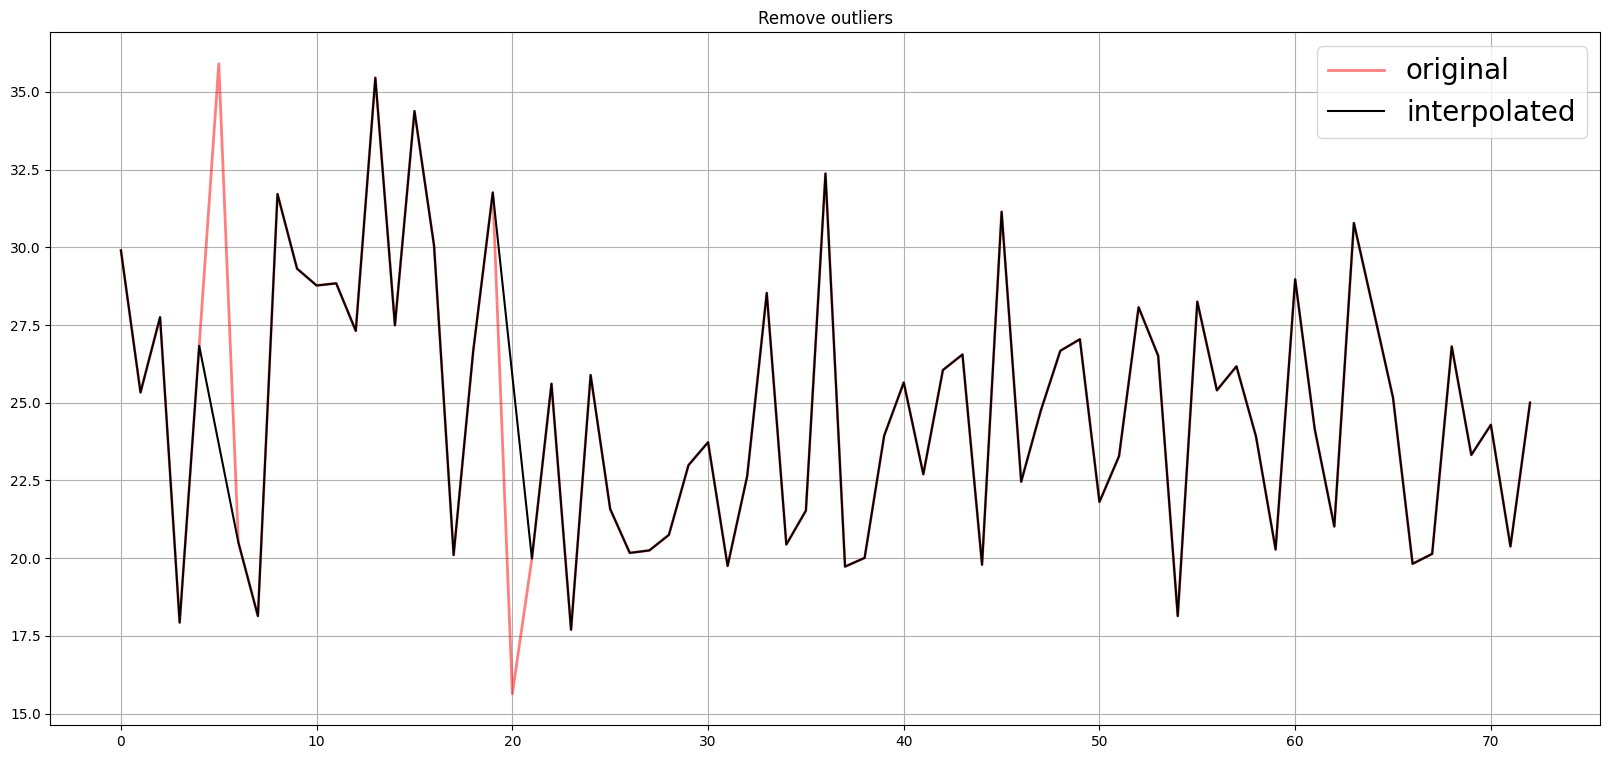

In [34]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
             title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black",
              label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()